# Задание

## Выбор варианта задания

Исходные данные:
* Факультет **ИУ**, кафедра **ИУ5**
* Учебная группа: **ИУ5-22М**
* Порядковый номер в группе на 23.03.2024: **15**

На основании этих данных были получены следующие задания:
| Задача 1 | Задача 2 |
|----------|----------|
|    15    |   35     |

Также имеется дополнительное требование для группы:
* Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

## Условия задач

Ниже представлены условия выданных задач

### Задача №15

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "возведение в степень".

### Задача №35

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе дерева решений.

# Ход выполнения работы

## Текстовое описание набора данных

В качестве набора данных используется dataset рейтингов университетов мира на основании трёх рейтингов. Датасет доступен по адресу: https://www.kaggle.com/mylesoneill/world-university-rankings

Из набора данных будет рассматриваться только файл `cwurData.csv`.

Описание столбцов:
* `world_rank` - мировой рейтинг университета
* `institution` - название университета
* `country` - страна, в которой расположен университет
* `national_rank` - рейтинг университета в стране его нахождения
* `quality_of_education` - рейтинг качества образования
* `quality_of_faculty` - рейтинг качества профессорско-преподавательского состава
* `publications` - рейтинг публикаций
* `infuence` - рейтинг влияния
* `citations` - количество студентов в университете
* `broad_impact` - рейтинг за широкое влияние (предоставлен только за 2014 и 2015 гг. Остальное - пропуски)
* `patents` - рейтинг за патенты
* `score` - общий балл, используемый для определения мирового рейтинга
* `year` - год рейтинга (с 2012 по 2015 год)

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

Подключаем Dataset

In [26]:
data = pd.read_csv('cwurData.csv', sep=",")

Размер набора данных

In [27]:
data.shape

(2200, 14)

Типы колонок

In [28]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

Проверяем, есть ли пропущенные значения

In [29]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Первые 5 строк датасета

In [30]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [31]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


Процент пропусков в `broad_impact`

In [32]:
(200 / 2200) * 100

9.090909090909092

Настройка отображения графиков

In [33]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4

## Обработка пропусков данных

### Очистка строк

Можно очистить строки, содержащие пропуски. При этом останутся данные только за 2014 и 2015 гг (см. описание датасета)

In [34]:
# Удаление строк, содержащих пустые значения
data_no_null = data.dropna(axis=0, how='any')
(data.shape, data_no_null.shape)

((2200, 14), (2000, 14))

Выведем первые 11 строк, чтобы убедиться, что данные в `national_rank` числовые (Jupyter Lab в предпросмотре CSV показывает не совсем верно)

In [35]:
data_no_null.head(11)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [36]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


## Кодирование категориальных признаков

Преобразуем названия стран, городов, ... в числовые зеачения (label encoding). Это необходимо для задания №35

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

======> `institution` <==========

In [38]:
le = LabelEncoder()
institution_le = le.fit_transform(data_no_null['institution'])

In [39]:
data_no_null['institution'].unique()

array(['Harvard University', 'Stanford University',
       'Massachusetts Institute of Technology', ...,
       'Babeș-Bolyai University', 'Henan Normal University',
       'Southwest Jiaotong University'], dtype=object)

In [40]:
arr_institution_encoded = np.unique(institution_le)
arr_institution_encoded

array([   0,    1,    2, ..., 1020, 1021, 1022])

In [41]:
le.inverse_transform([n for n in range(1023)])

array(['AGH University of Science and Technology', 'Aalborg University',
       'Aalto University', ..., 'École normale supérieure de Cachan',
       'École normale supérieure de Lyon', 'Örebro University'],
      dtype=object)

======> `country` <==========

In [42]:
le_country = LabelEncoder()
country_le = le_country.fit_transform(data_no_null['country'])

In [43]:
data_no_null['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'Russia', 'China', 'Taiwan',
       'Sweden', 'Singapore', 'Denmark', 'Germany', 'Netherlands',
       'Italy', 'Belgium', 'Australia', 'Finland', 'Norway',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [44]:
np.unique(country_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

In [45]:
le_country.inverse_transform([n for n in range(59)])

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Puerto Rico',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay'], dtype=object)

In [46]:
data_no_null.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


In [47]:
data_digit = data_no_null.copy()
#data_digit.pop('institution')
#data_digit.pop('country')
data_digit["institution"] = institution_le
data_digit['country'] = country_le
data_digit

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,184,54,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,511,54,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,312,54,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,637,57,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,819,57,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,954,37,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,11,14,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,132,4,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,576,48,40,367,567,218,886,974,812,975.0,651,44.02,2015


Проверяем типы данных

In [48]:
data_digit.dtypes

world_rank                int64
institution               int64
country                   int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

## Вспомагательные функции

In [49]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

## Графики по набору данных

Построим основные гистограммы по этому набору данных

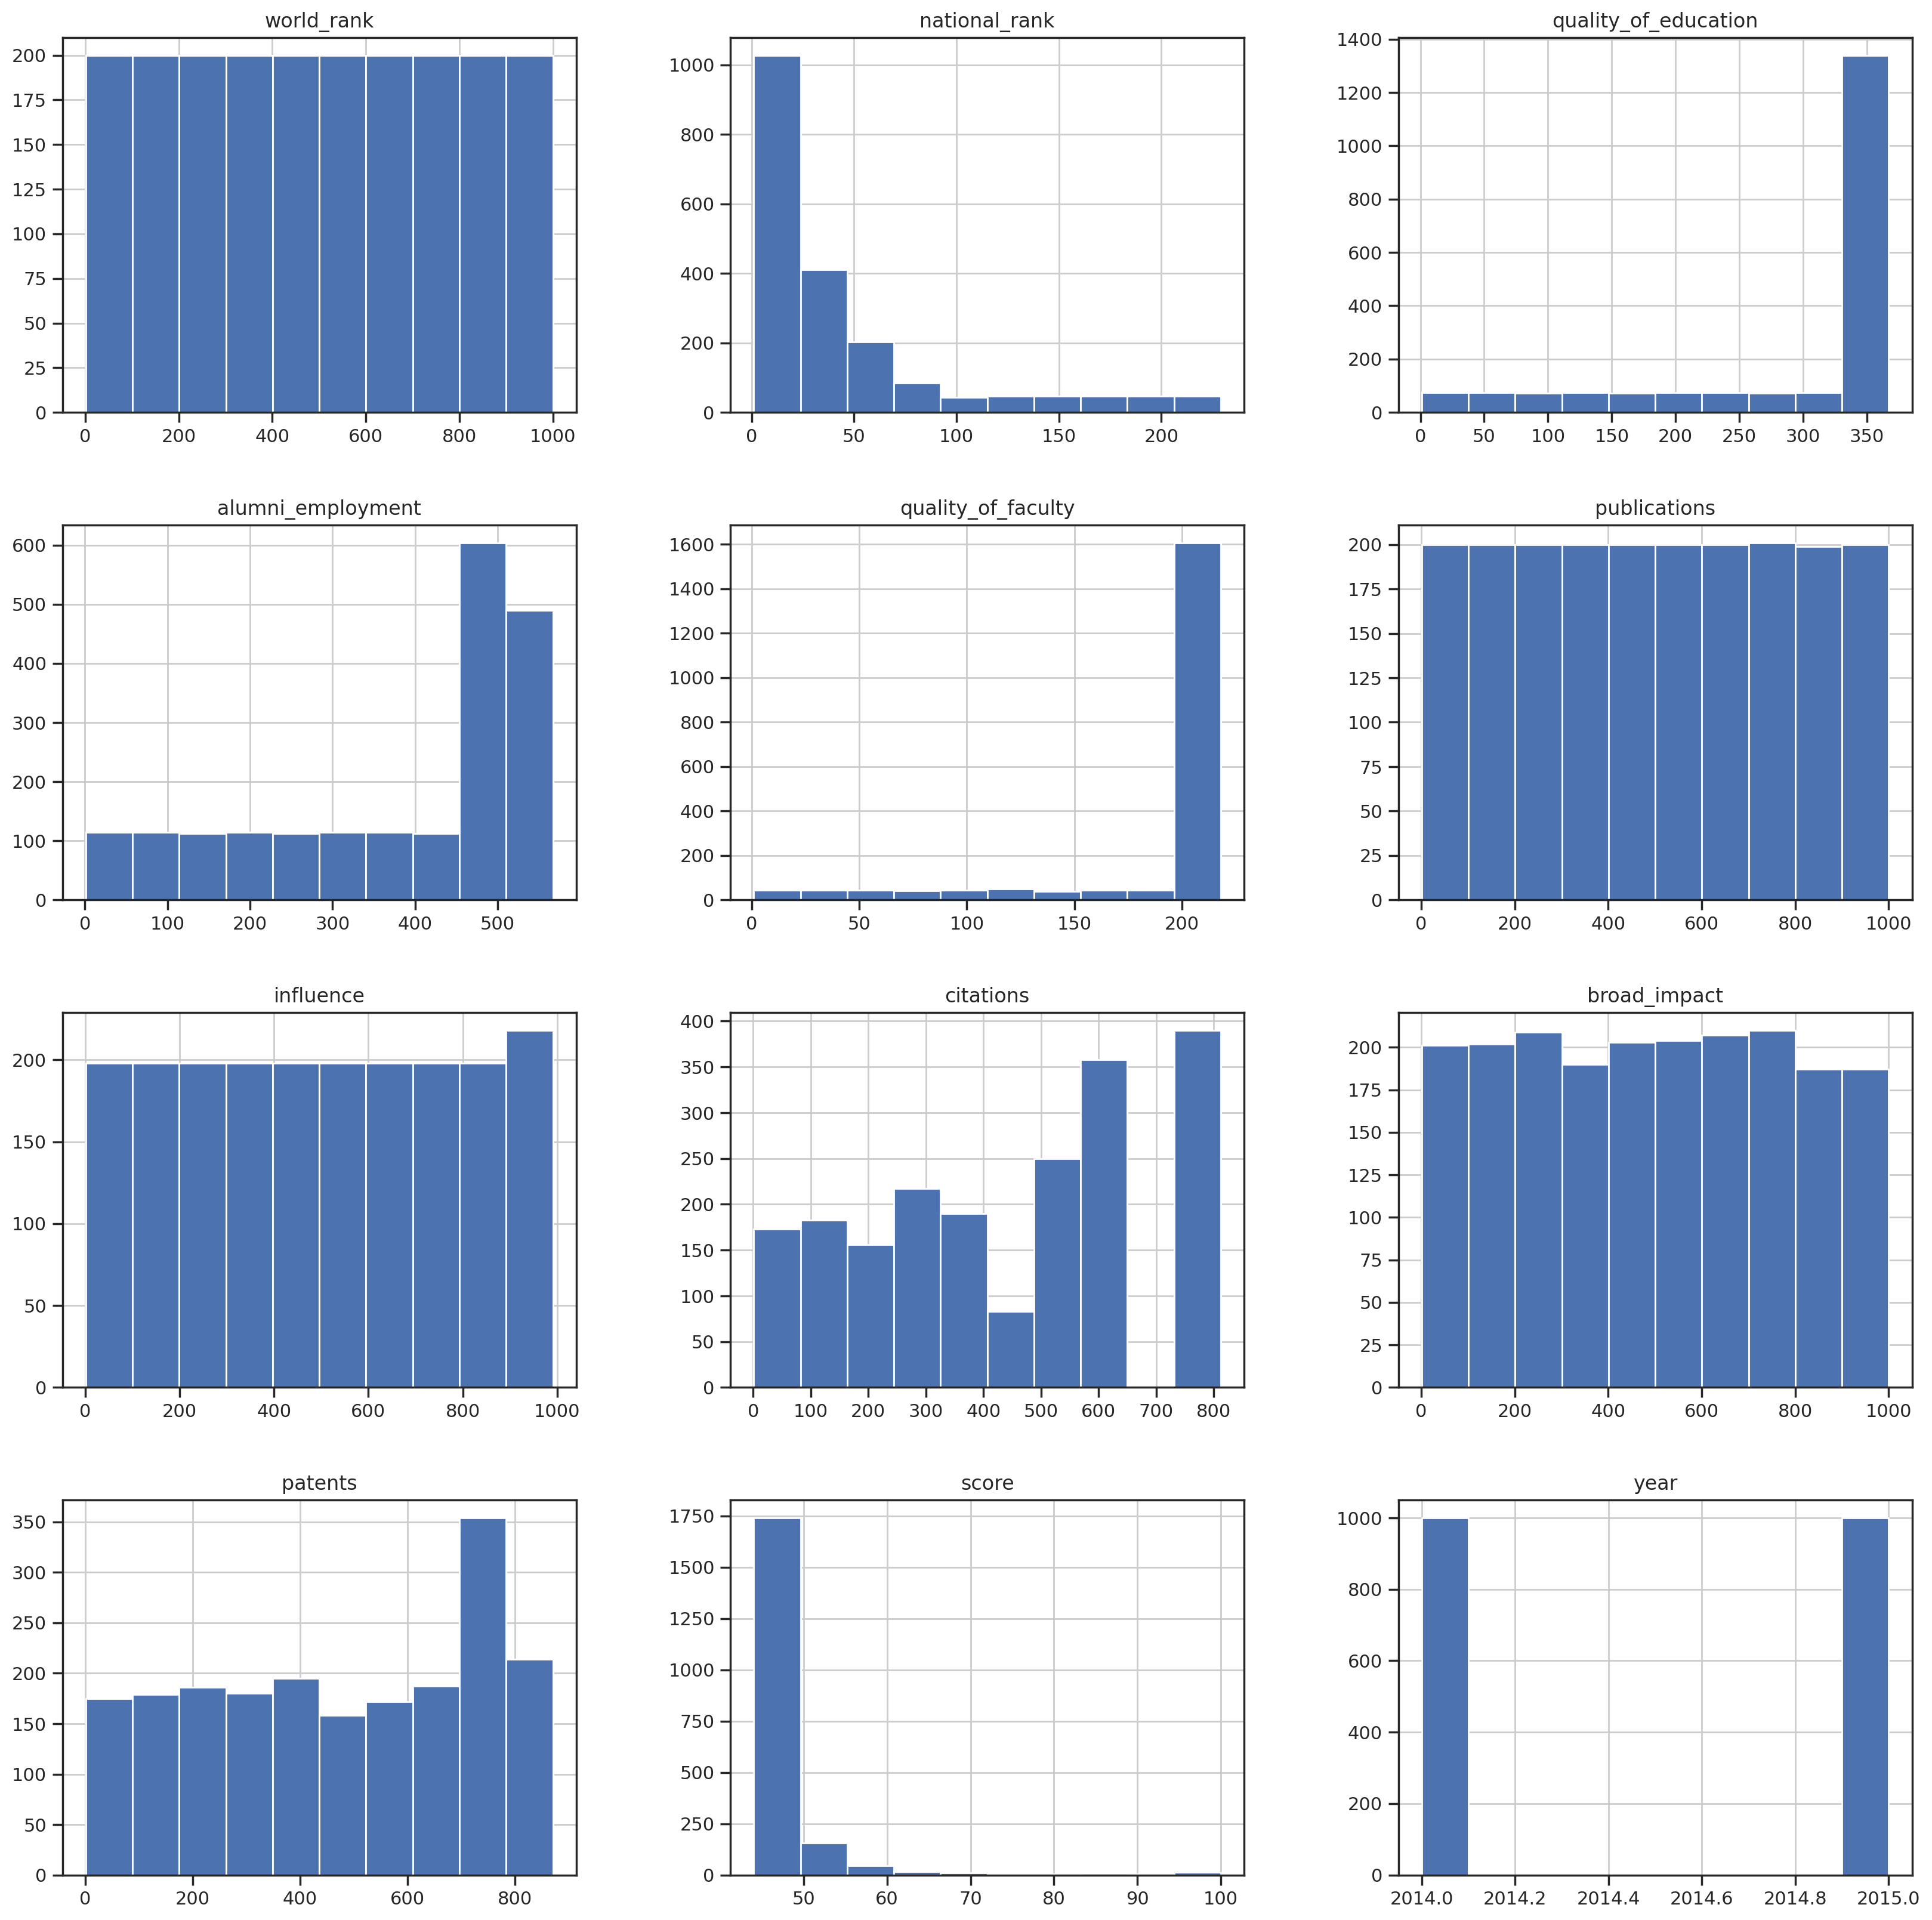

In [50]:
data_no_null.hist(figsize=(20,20))
plt.show()

## Нормализация данных (задача №15)

Нормализация методом возведения в степень выполнена на колонке `citations`

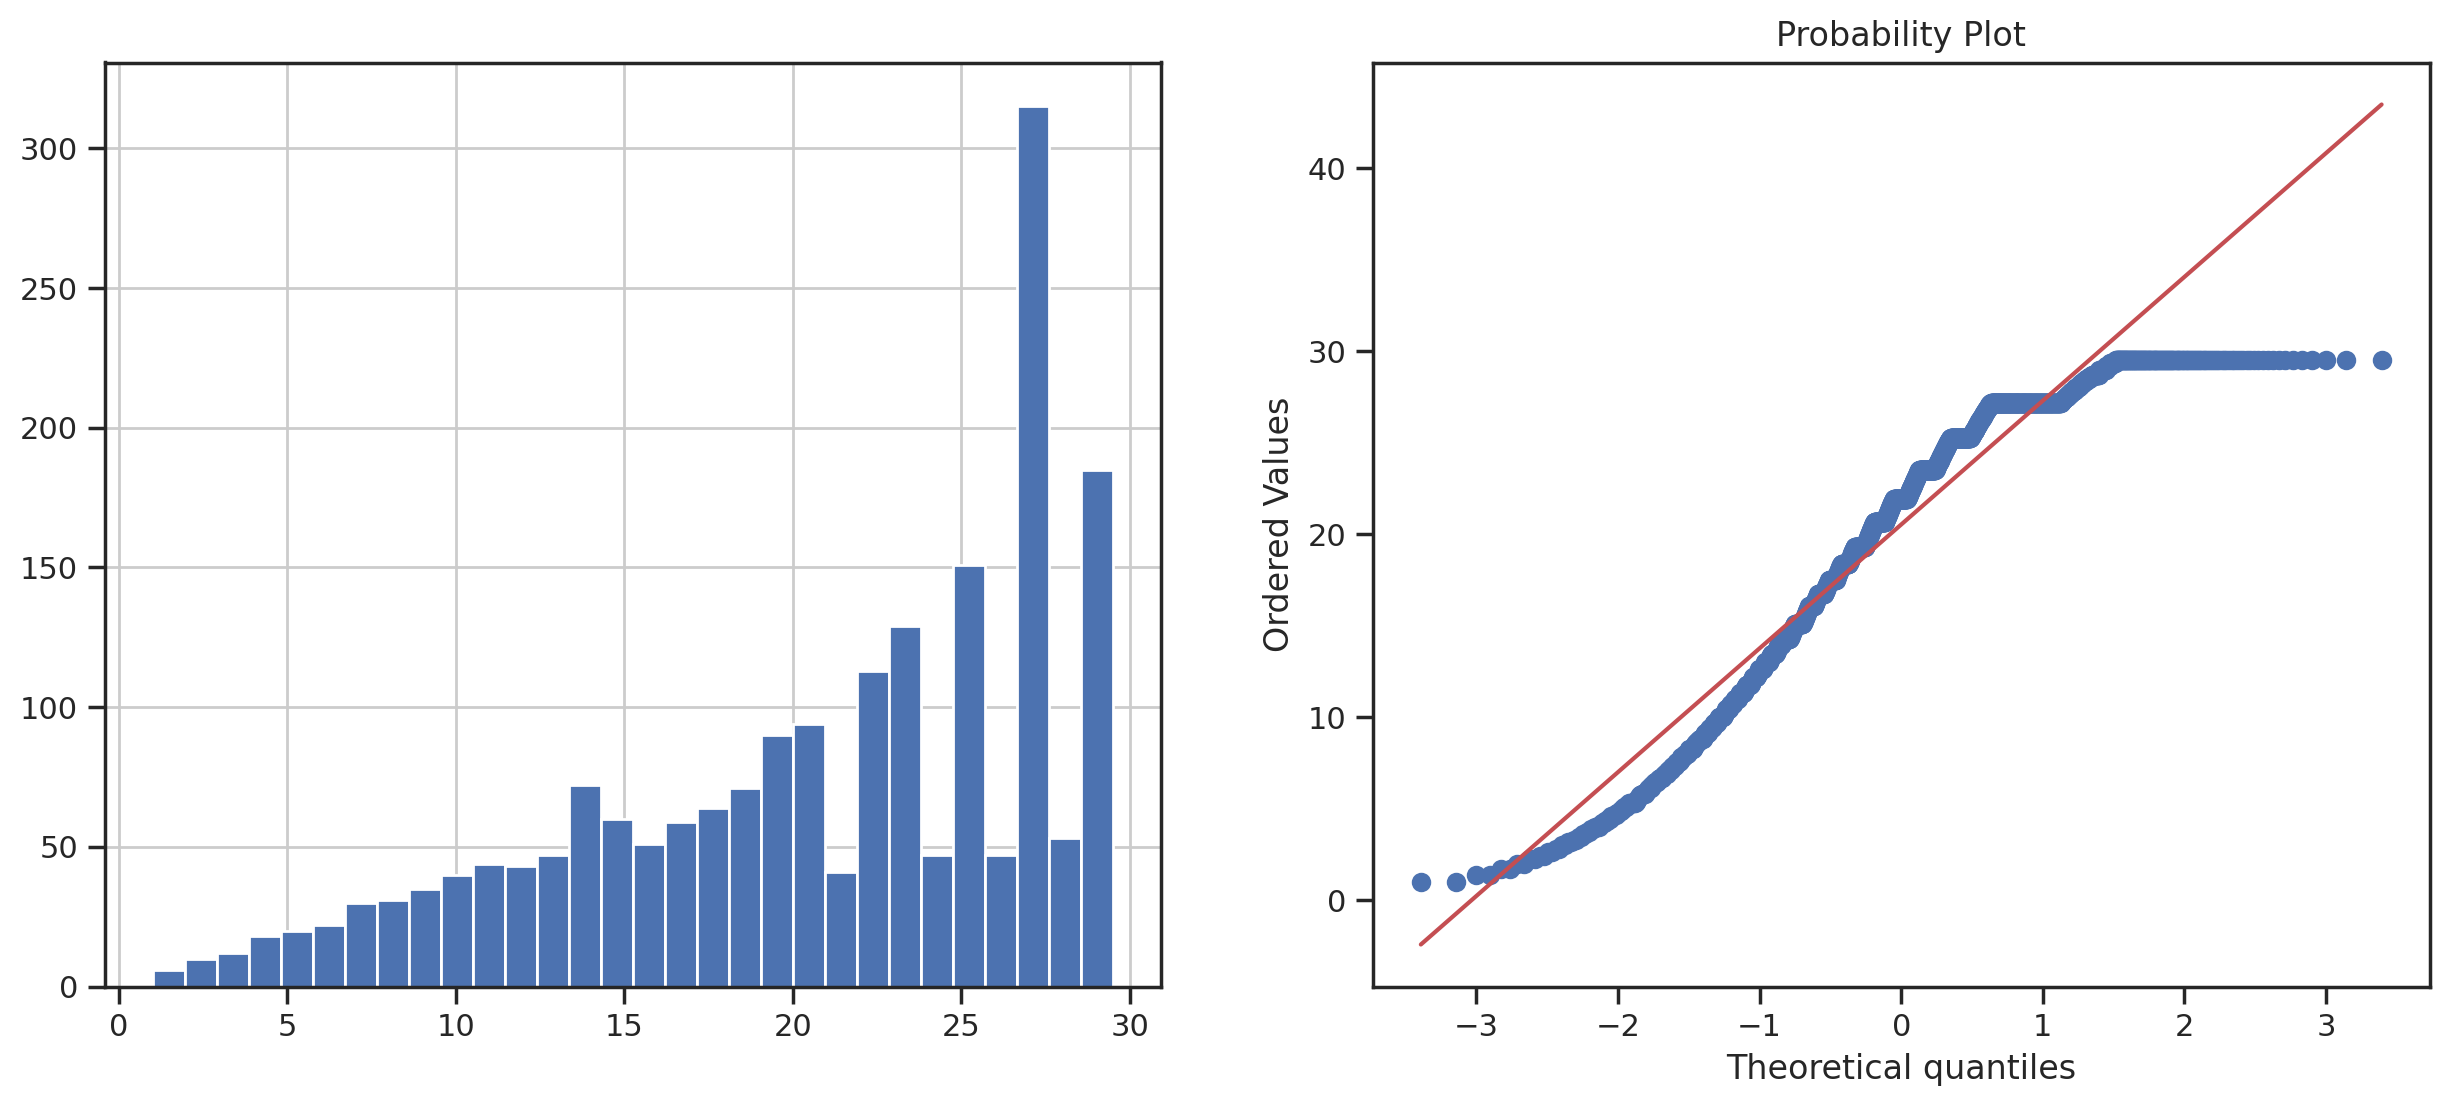

In [51]:
data_normal = data_no_null.copy()
data_normal['patents'] = data_no_null['patents']**(1/2)
diagnostic_plots(data_normal, 'patents')

## Отбор признаков (задача №35)

Для отбора будем использовать методы вложений с использованием решающего дерева. В иРК будет использован `DecisionTreeRegressor`

Отделим целевой признак `world_rank`

In [52]:
data_x = data_digit.copy()
data_x = data_x.drop(columns='world_rank')
data_x

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,184,54,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,511,54,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,312,54,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,637,57,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,819,57,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,954,37,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,11,14,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,132,4,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,576,48,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [55]:
data_y = data_digit['world_rank']
data_y

200        1
201        2
202        3
203        4
204        5
        ... 
2195     996
2196     997
2197     998
2198     999
2199    1000
Name: world_rank, Length: 2000, dtype: int64

In [56]:
dtc1 = DecisionTreeRegressor()
dtc1.fit(data_x, data_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([5.27838667e-05, 9.02680188e-06, 1.16551290e-04, 2.72980370e-04,
        4.48968033e-03, 4.87300105e-04, 4.48830192e-04, 6.51929437e-05,
        4.53535493e-05, 1.07482543e-01, 1.99057595e-03, 8.79654143e-01,
        4.88503893e-03]),
 1.0)

In [57]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

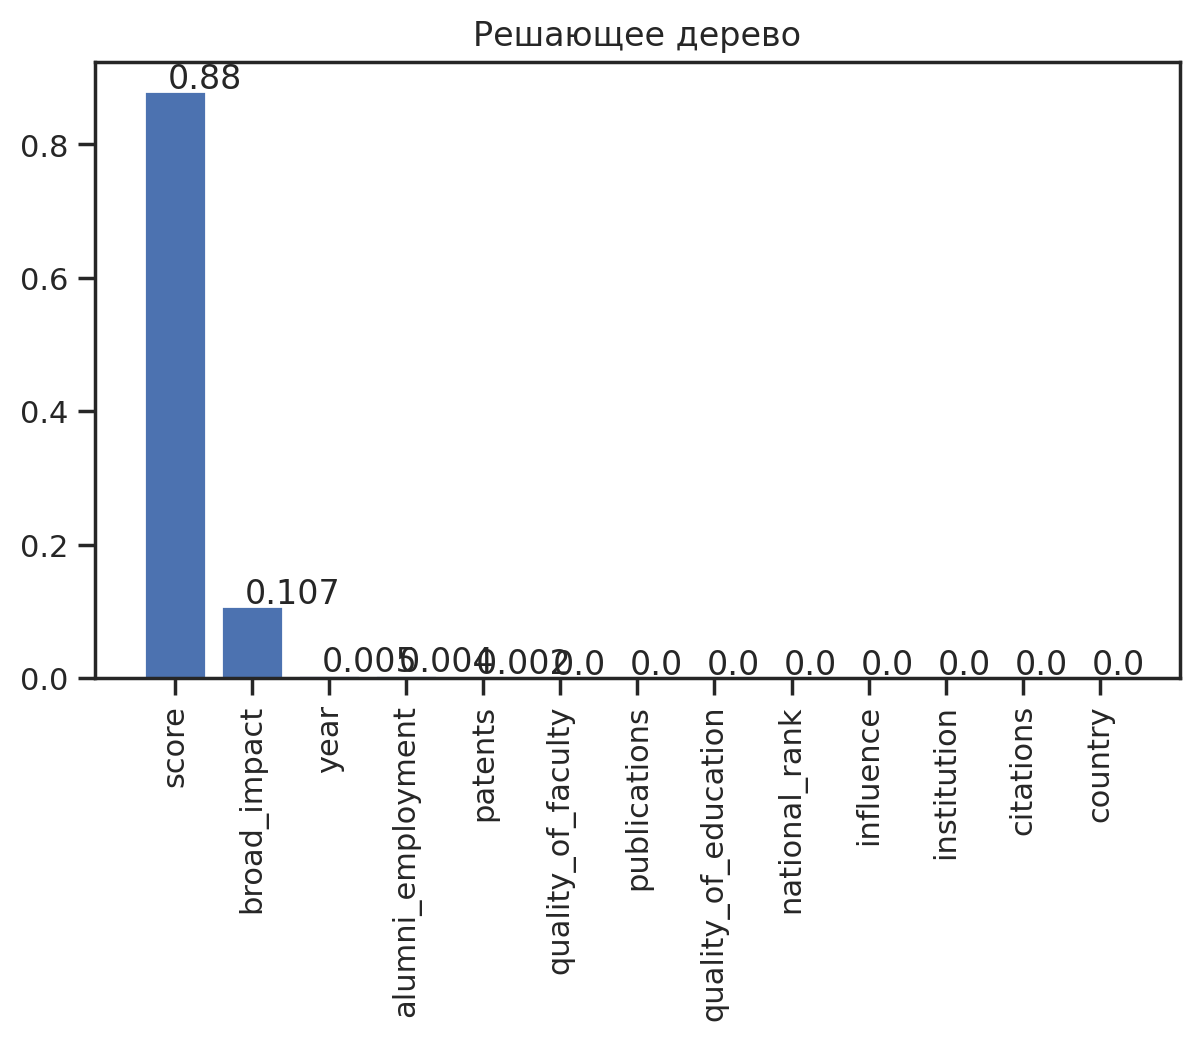

In [58]:
_,_=draw_feature_importances(dtc1, data_x, 'Решающее дерево')